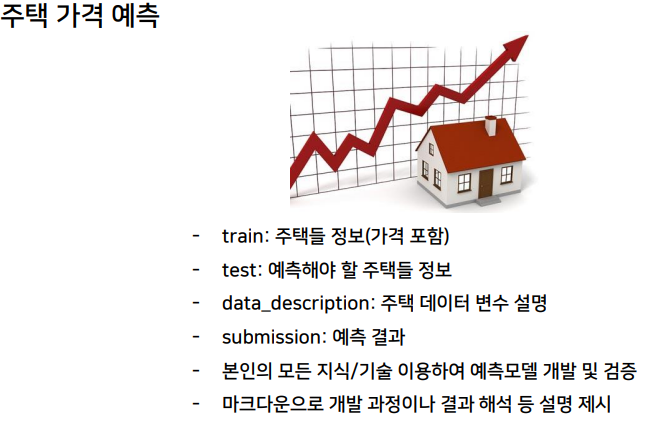

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm # 가우시안 정규분포 객체

In [2]:
train=pd.read_csv("train_bt.csv",index_col='Id')
test=pd.read_csv("test_bt.csv",index_col='Id')
submission=pd.read_csv('submission_bt.csv',index_col='Id')
data=train

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

train 데이터를 기준으로 보면 0번부터 1460개의 열과 81개의 컬럼이 있습니다. 그리고 SalePrice라는 목표열도 있습니다.

In [5]:
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


test를 보시면 id가 1461번부터 총 1459개의 행이 들어 있는데 열이 하나가 빠졌습니다.구해야할 SalePrice입니다.

In [6]:
test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [7]:
pd.set_option('display.max_rows', 500)
train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

## 데이터 확인

### 타겟 변수 확인 (Distribution of Target)

- 오른쪽이든 왼쪽이든 심한 비대칭은 머신러닝 알고리즘이 학습을 잘 하지 못하도록 방해하는 요소 중 하나이다. 
- 대부분의 데이터가 왼쪽에 있다면, 오른쪽 꼬리 부분은 데이터가 적어서 학습이 잘 안될 가능성이 있다. 
- 따라서 예측 결과물도 의심할 수 밖에 없다. 
- 이런 상황에서 'Right Skewed' 를 해결하는 대표적인 방법이 바로 해당 변수에 로그를 취하는 것이다.

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

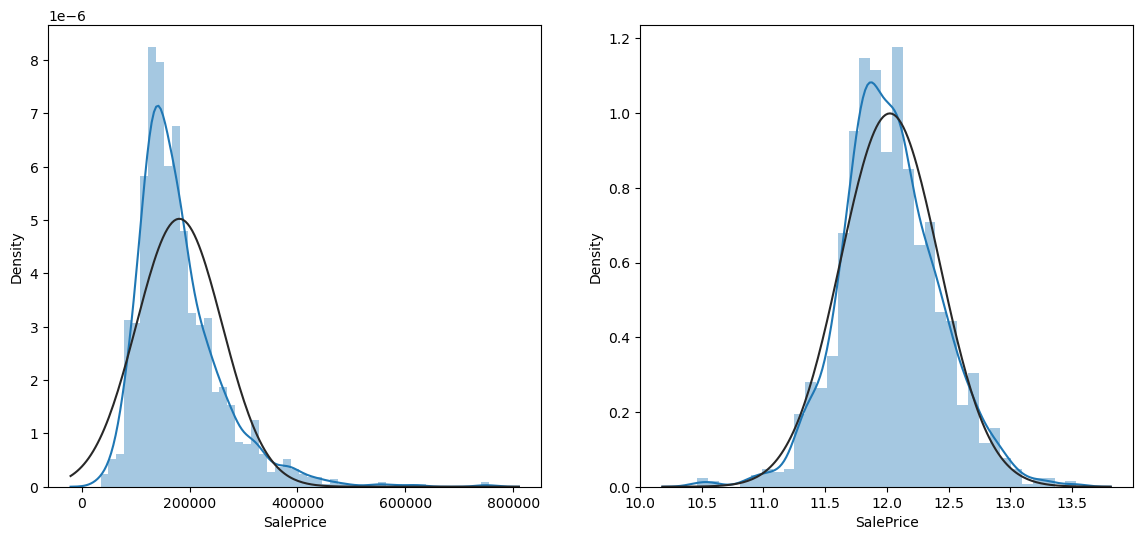

In [8]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(train['SalePrice'], fit=norm, ax=ax1)

# log0의 값은 없기 때문에 +1 해준다.
sns.distplot(np.log(train['SalePrice']+1), fit=norm, ax=ax2)

### 변수간 상관관계 확인 (Feature Correlation)

<AxesSubplot:>

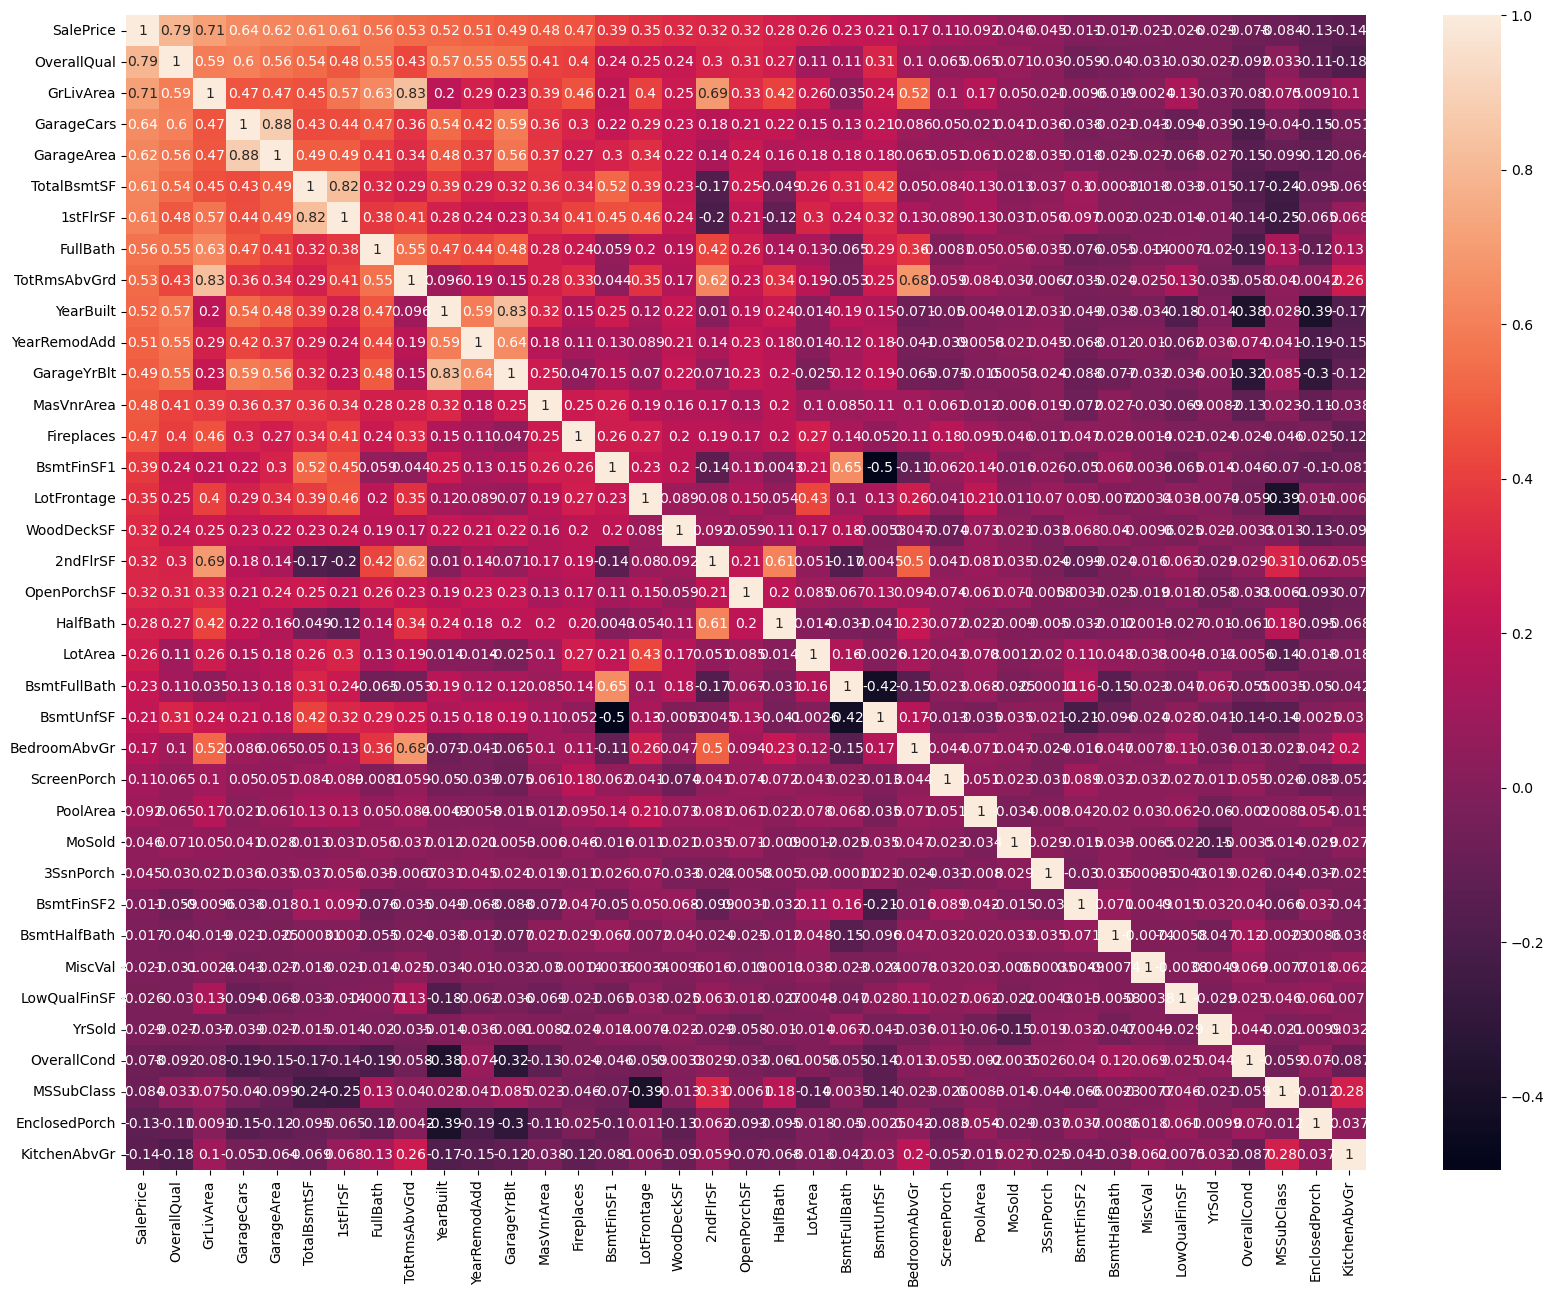

In [9]:
corr=train.corr()
top_corr=train[corr.nlargest(40,'SalePrice')['SalePrice'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

- 변수 'OverallQual' 이라는 변수가 상관계수 0.79로 타겟변수와 가장 큰 상관관계를 가지고 있는 것으로 나타났다. 
- 전반적으로 OverallQual 이 증가하면, 집값도 증가한다고 볼 수 있다는 뜻이다. 


<AxesSubplot:>

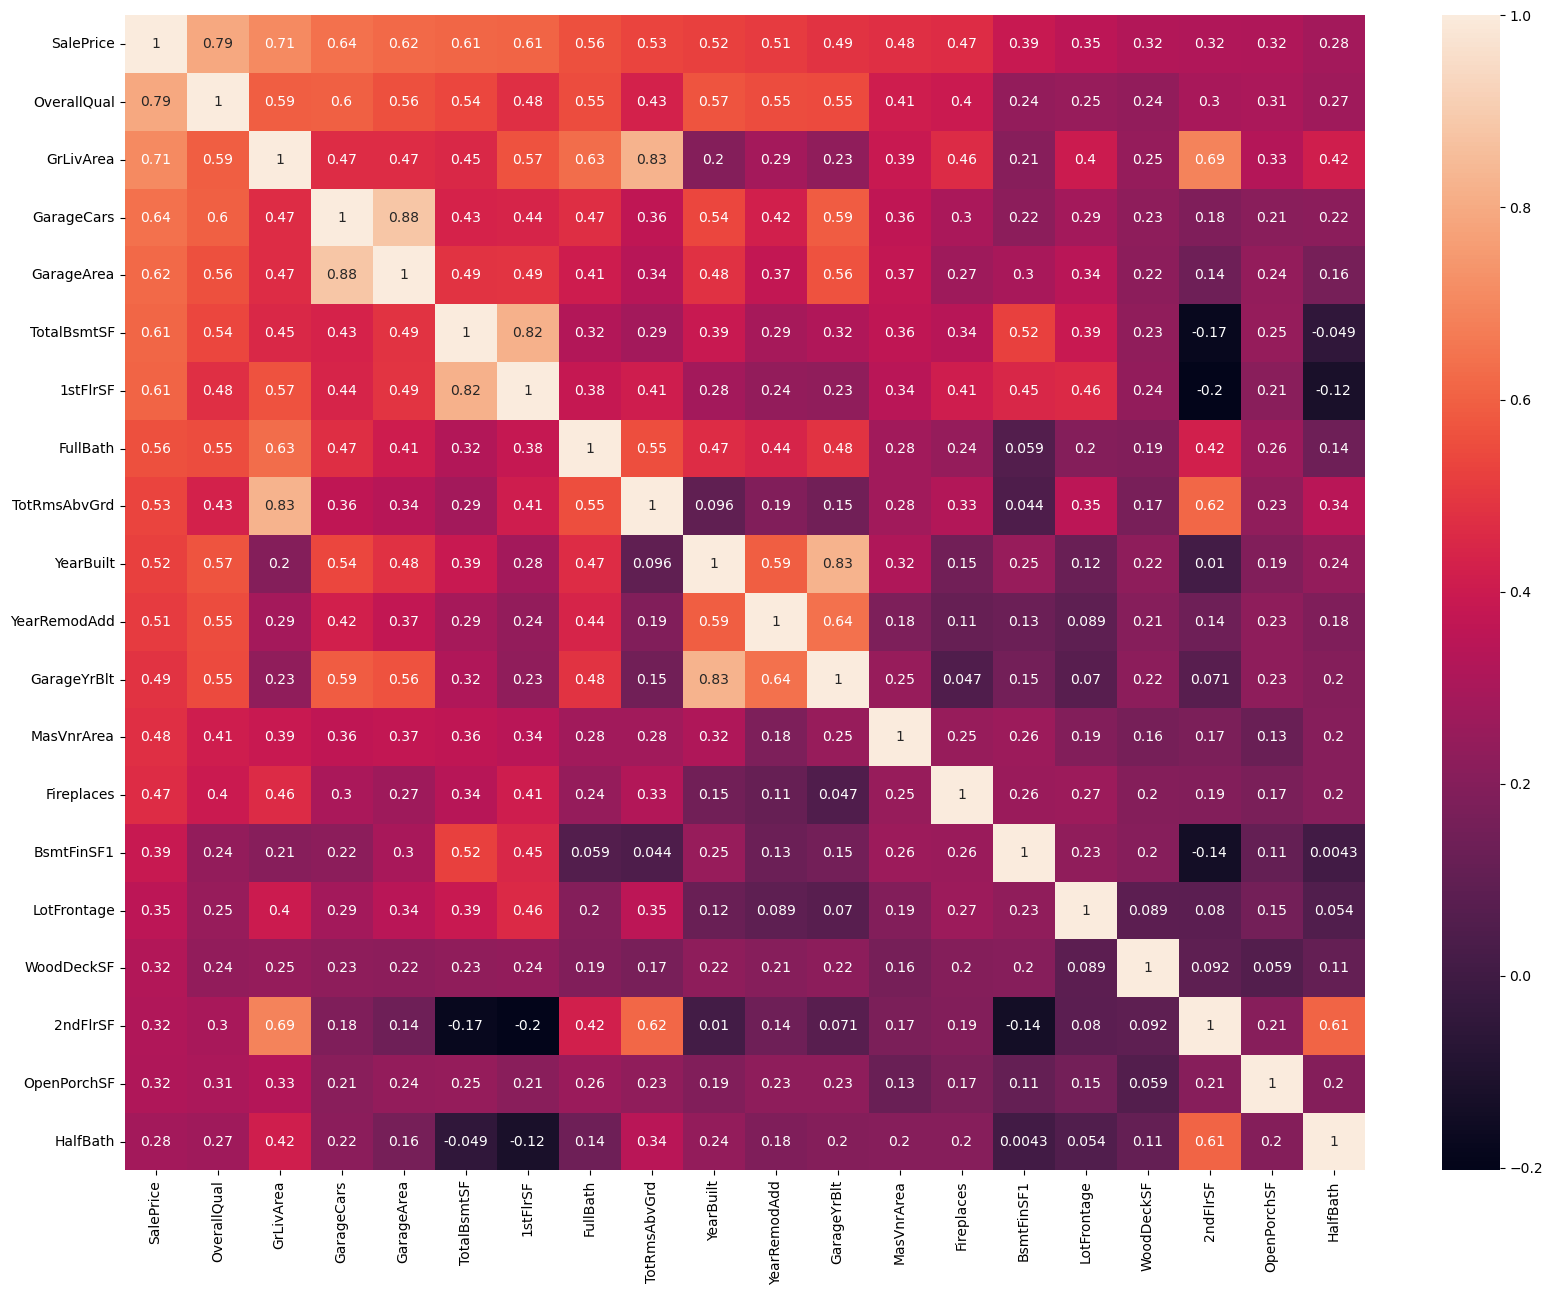

In [10]:
corr=train.corr()
top_corr=train[corr.nlargest(20,'SalePrice')['SalePrice'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

- 상관계수가 큰 피처들을 시각화 해보기

-OverallQual: 집의 전체 자재 및 마감을 평가합니다.

-GrLivArea: 지상(지상) 거실 면적 평방 피트

-GarageCars: 차고의 차고 크기

-GarageArea: 평방 피트의 차고 크기

-TotalBsmtSF: 지하 면적의 총 평방 피트

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

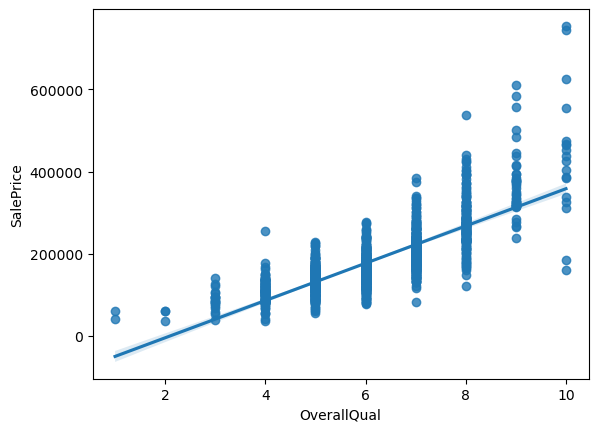

In [11]:
# OverallQual: 집의 전체 자재 및 마감을 평가합니다.
sns.regplot(train['OverallQual'], train['SalePrice'])

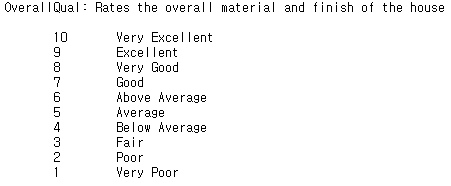

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

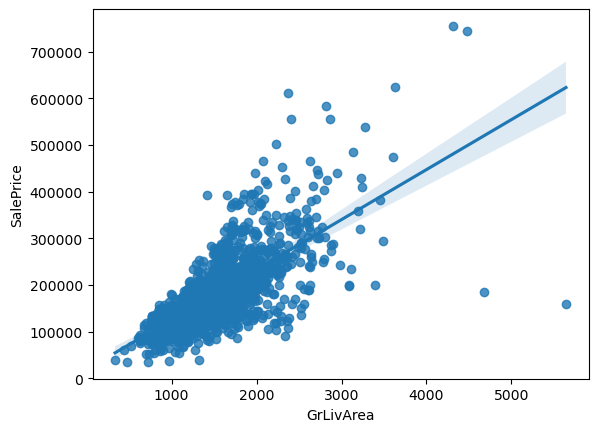

In [12]:
# GrLivArea: 지상(지상) 거실 면적 평방 피트
sns.regplot(train['GrLivArea'], train['SalePrice'])

In [13]:
# 그래프를 봤을 때 이상치라고 판단하여 삭제해주었다.
train=train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

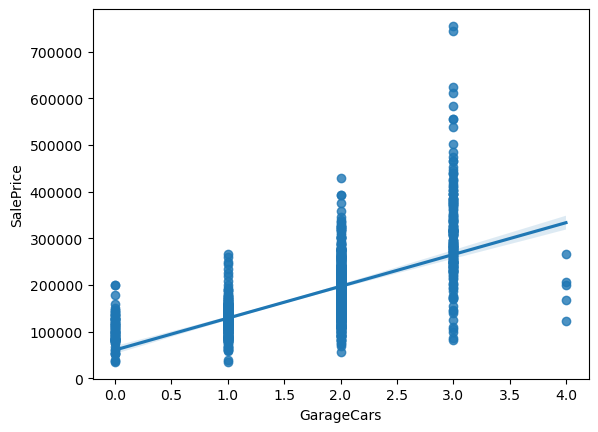

In [14]:
sns.regplot(train['GarageCars'], train['SalePrice'])

GarageArea는 약간 이상치 같은 값이 있지만 상관관계가 아주 크진 않아서 제거하지 않았다.

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

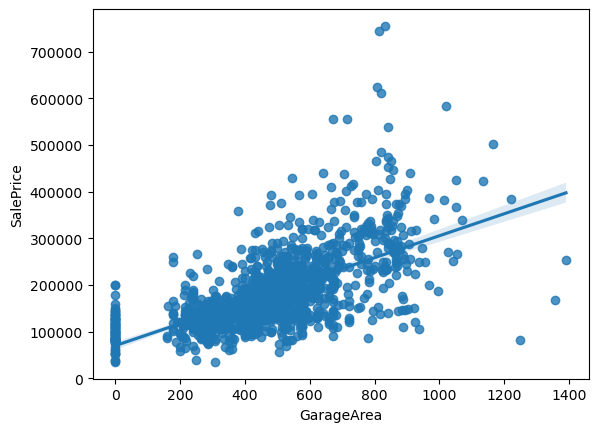

In [15]:
sns.regplot(train['GarageArea'], train['SalePrice'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

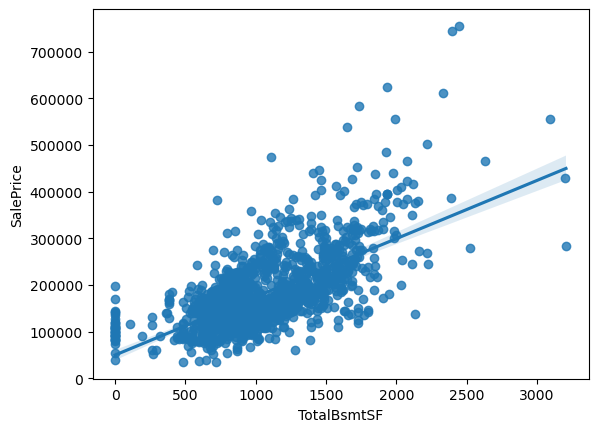

In [16]:
sns.regplot(train['TotalBsmtSF'], train['SalePrice'])

train과 test 데이터를 묶어 all_data라는 변수에 저장 후 처리, 이후에 다시 분할함

- 로그를 씌우는데 +1 을 해주는 이유는 log0 의 값이 없기 때문이다. 
- 공짜 집은 없겠지만 만약 y_train의 값중 하나가 0이라면 log0은 마이너스 무한대로 커지기 때문에 +1씩 해주어서 이를 방지한다. 
- 이를 'log1p' 라고 하기도 한다. 

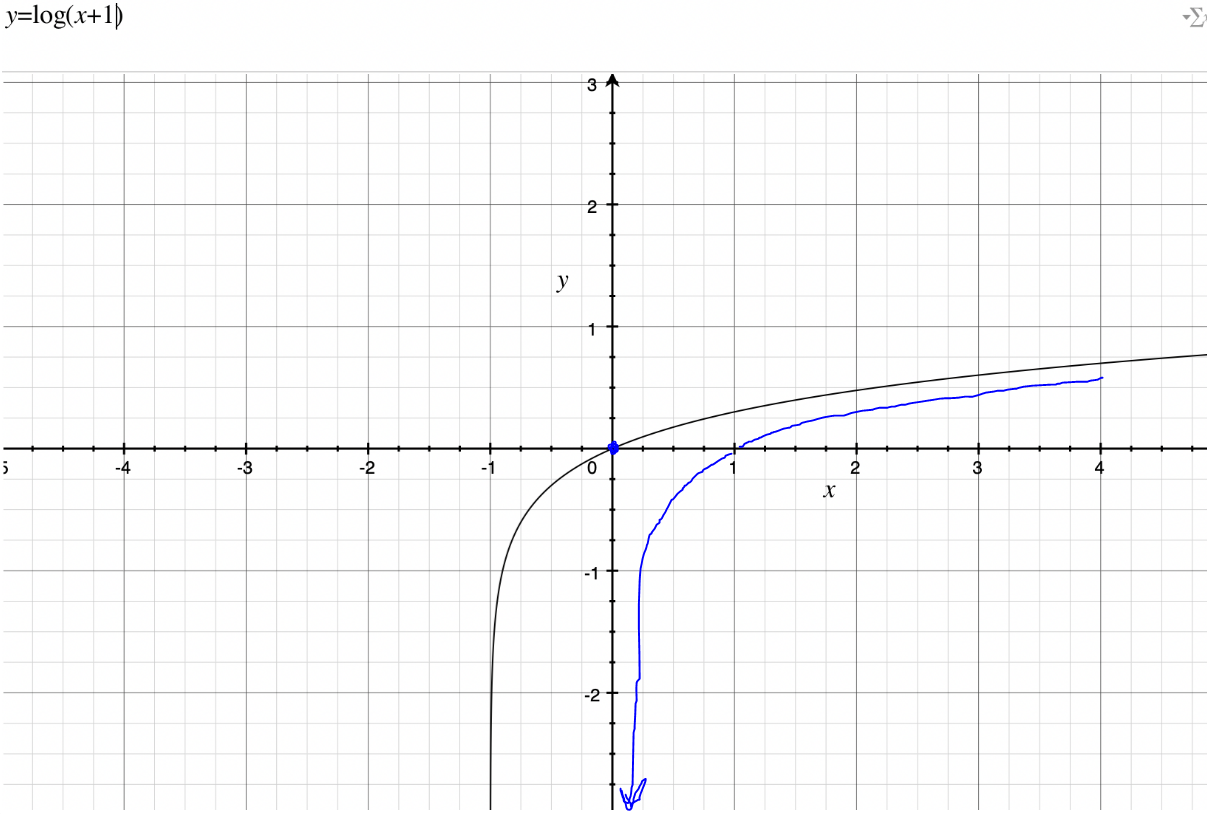

In [17]:
y_train=train['SalePrice'] # 타겟변수를 미리 저장해두기
train=train[list(test)]
all_data=pd.concat((train, test), axis=0)
print(all_data.shape)
y_train=np.log(y_train+1)

(2917, 79)


### 전체 데이터에서 결측치 확인

결측치가 있는 열 이름들만 출력해보았다.

In [18]:
cols=list(all_data)
for col in list(all_data):
    if (all_data[col].isnull().sum())==0:
        cols.remove(col)
    else:
        pass
print(len(cols))

34


In [19]:
print(cols)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [20]:
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index

In [21]:
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [22]:
# 범주형변수-집에 해당 시설물이 없는 경우 문자열 'None'으로 채움
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

# 수치형 변수-집에 해당 시설물이 없는 경우 0으로 채움
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea','LotFrontage'):
    all_data[col] = all_data[col].fillna(0)

# 해당 시설물이 없다고 보기 애매한 경우 최빈값으로 채움.
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
    
print(f"Total count of missing values in all_data : {all_data.isnull().sum().sum()}")

Total count of missing values in all_data : 0


## EDA

### 전체 면적을 나타내는 피처 생성

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='SalePrice'>

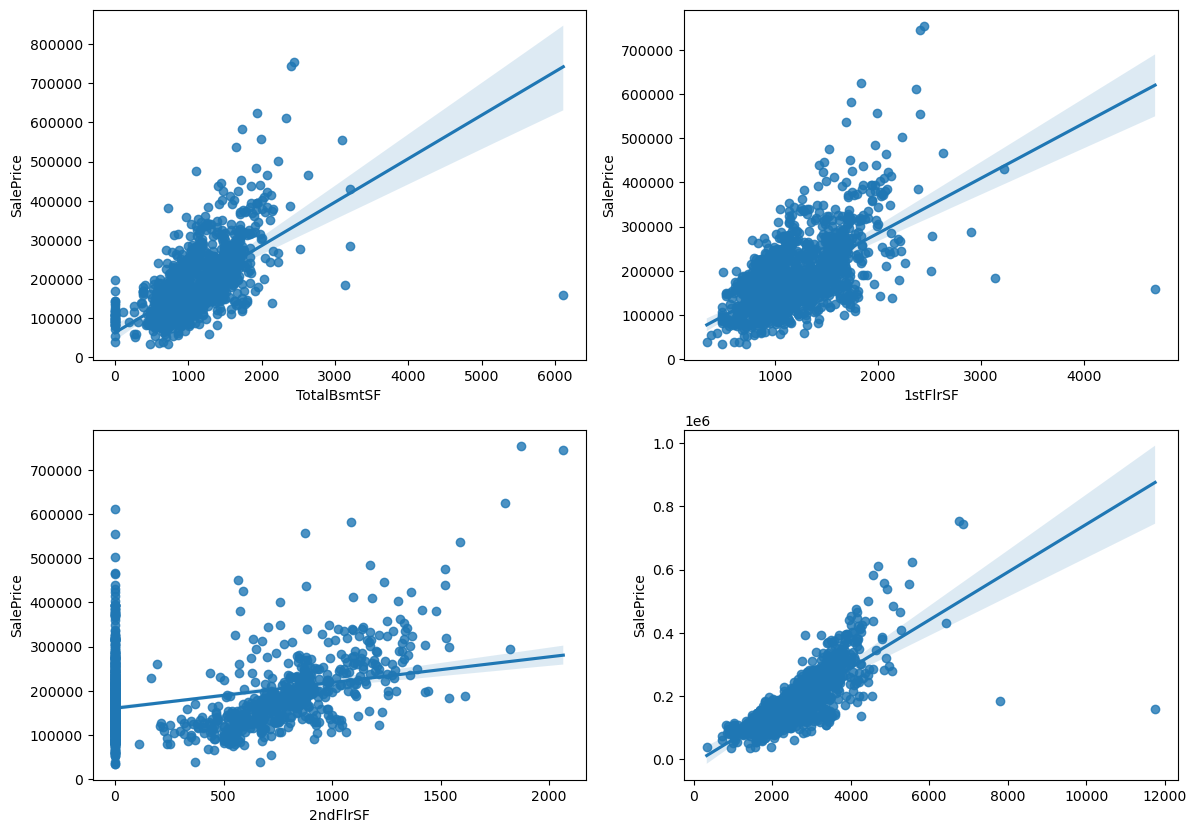

In [23]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,10)
sns.regplot(data['TotalBsmtSF'], data['SalePrice'], ax=ax1)
sns.regplot(data['1stFlrSF'], data['SalePrice'], ax=ax2)
sns.regplot(data['2ndFlrSF'], data['SalePrice'], ax=ax3)
sns.regplot(data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'], data['SalePrice'], ax=ax4)

In [24]:
# 전체 면적을 나타내는 피처 생성
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
# 2층 없음 피처 생성
all_data['No2ndFlr']=(all_data['2ndFlrSF']==0)
# 지하실 없음 피처 생성
all_data['NoBsmt']=(all_data['TotalBsmtSF']==0)

### 욕실에 대해서 새로운 피처 생성

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ebdl\Anaconda3\l

<AxesSubplot:ylabel='SalePrice'>

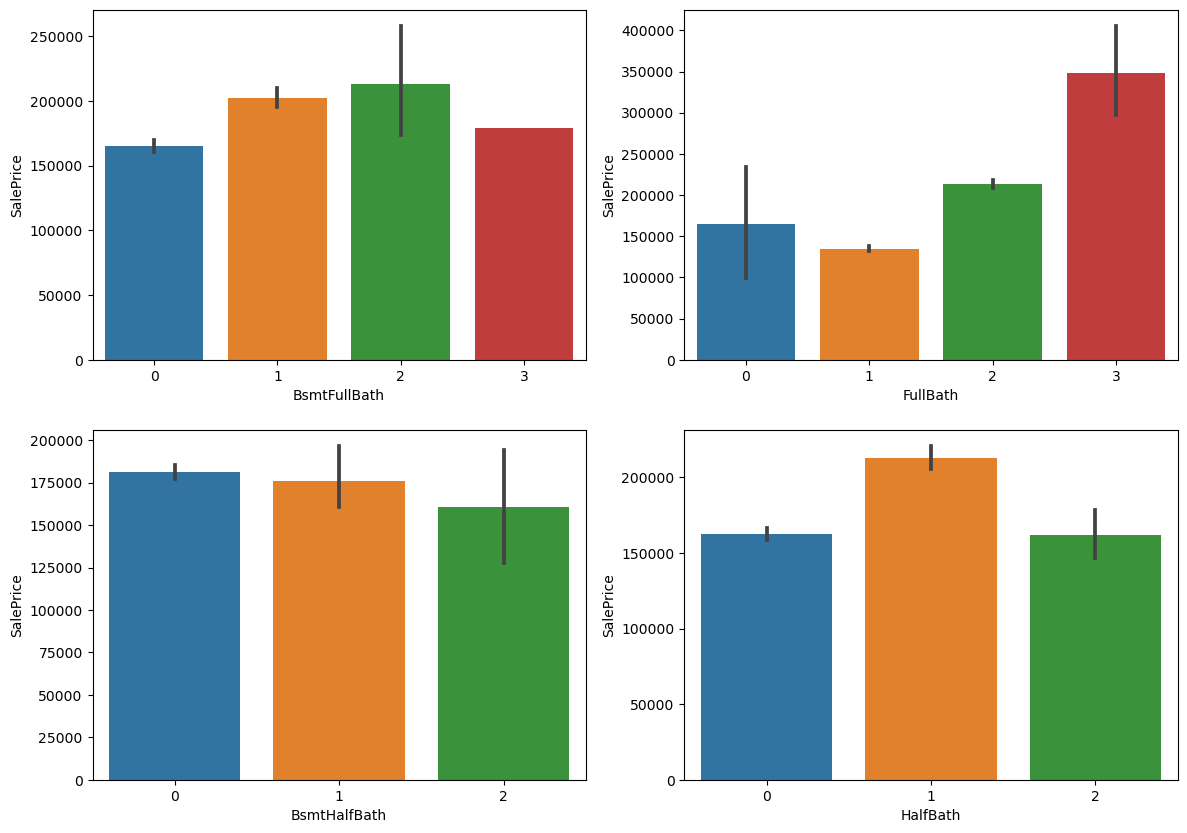

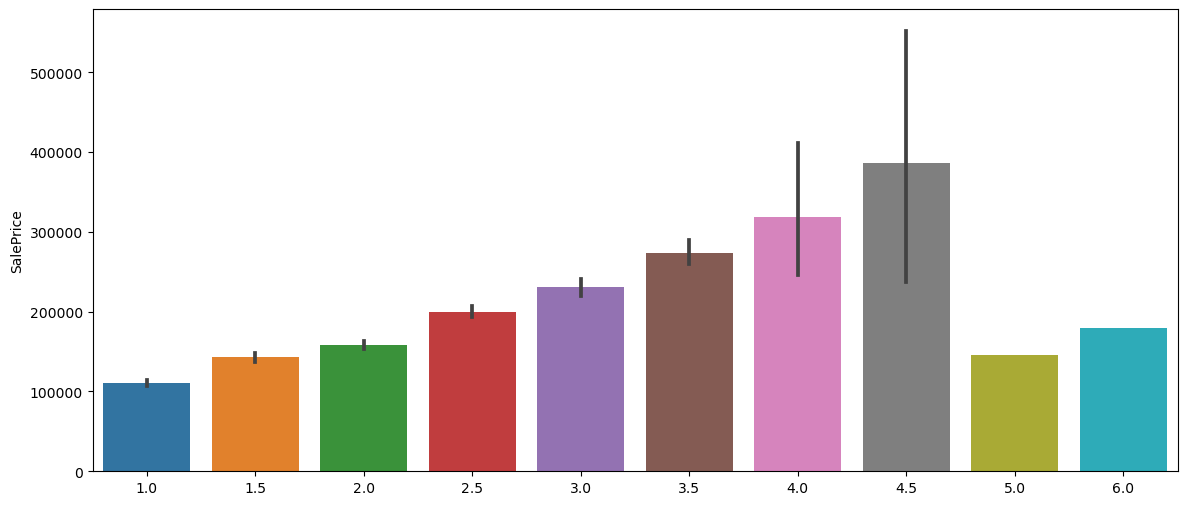

In [25]:
# 위와 마찬가지 방식으로 욕조에 대해서도 시각화해봄 

figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,10)
sns.barplot(data['BsmtFullBath'], data['SalePrice'], ax=ax1)
sns.barplot(data['FullBath'], data['SalePrice'], ax=ax2)
sns.barplot(data['BsmtHalfBath'], data['SalePrice'], ax=ax3)
sns.barplot(data['HalfBath'], data['SalePrice'], ax=ax4)

figure, (ax5) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(14,6)
sns.barplot(data['BsmtFullBath'] + data['FullBath'] + (data['BsmtHalfBath']/2) + (data['HalfBath']/2), data['SalePrice'], ax=ax5)

In [26]:
all_data['TotalBath']=all_data['BsmtFullBath'] + all_data['FullBath'] + (all_data['BsmtHalfBath']/2) + (all_data['HalfBath']/2)

- 데이터 설명을 보면 나와있지만 'MSSubClass' 는 사실 숫자로 이루어진 데이터지만, 각각의 숫자가 의미를 갖고있는 범주형 변수이다. 

- 그리고 판매 연, 월도 역시 연산 개념을 적용하는데는 무리가 있다. 그래서 이들을 문자열로 바꿔주자. 

In [27]:
all_data['MSSubClass']=all_data['MSSubClass'].astype(str)
all_data['MoSold']=all_data['MoSold'].astype(str)
all_data['YrSold']=all_data['YrSold'].astype(str)

### 지하실

In [28]:
# 지하실에 관한 변수들을 묶어서 저장
Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
Bsmt=all_data[Basement]

In [29]:
# 이들을 인코딩해준다. 이 'Po', 'Fa'등의 값은 data description 텍스트 파일에 나와있다. 
# 따라서 순서대로 좋은 값에는 높은 숫자를, 안좋은 값에는 낮은 숫자를, 지하실이 없으면 0을 입력해주었다. 
Bsmt=Bsmt.replace(to_replace='Po', value=1)
Bsmt=Bsmt.replace(to_replace='Fa', value=2)
Bsmt=Bsmt.replace(to_replace='TA', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)
Bsmt=Bsmt.replace(to_replace='Ex', value=5)
Bsmt=Bsmt.replace(to_replace='None', value=0)

Bsmt=Bsmt.replace(to_replace='No', value=1)
Bsmt=Bsmt.replace(to_replace='Mn', value=2)
Bsmt=Bsmt.replace(to_replace='Av', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)

Bsmt=Bsmt.replace(to_replace='Unf', value=1)
Bsmt=Bsmt.replace(to_replace='LwQ', value=2)
Bsmt=Bsmt.replace(to_replace='Rec', value=3)
Bsmt=Bsmt.replace(to_replace='BLQ', value=4)
Bsmt=Bsmt.replace(to_replace='ALQ', value=5)
Bsmt=Bsmt.replace(to_replace='GLQ', value=6)

In [30]:
# 'BsmtScore' 항목을 만들어 지하실의 전반적인 상태를 복합적으로 평가할 수 있는 변수를 만들었다.
Bsmt['BsmtScore']= Bsmt['BsmtQual']  * Bsmt['BsmtCond'] * Bsmt['TotalBsmtSF']
all_data['BsmtScore']=Bsmt['BsmtScore']

#  'BsmtFin' 변수는 지하실이 공사중이라면, 완성 면적과 상태를 포함하는 변수이다. 
Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
all_data['BsmtFinScore']=Bsmt['BsmtFin']

# 'BsmtDNF' 는 지하실의 미완성 여부를 나타내는 변수이다. 
all_data['BsmtDNF']=(all_data['BsmtFinScore']==0)

### 토지

In [31]:
lot=['LotFrontage', 'LotArea','LotConfig','LotShape']
Lot=all_data[lot]

Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)

all_data['LotScore']=Lot['LotScore']

C:\Users\ebdl\AppData\Local\Temp\ipykernel_20220\2700291747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)


### 차고점수

In [32]:
garage=['GarageArea','GarageCars','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']
Garage=all_data[garage]
all_data['NoGarage']=(all_data['GarageArea']==0)

In [33]:
Garage=Garage.replace(to_replace='Po', value=1)
Garage=Garage.replace(to_replace='Fa', value=2)
Garage=Garage.replace(to_replace='TA', value=3)
Garage=Garage.replace(to_replace='Gd', value=4)
Garage=Garage.replace(to_replace='Ex', value=5)
Garage=Garage.replace(to_replace='None', value=0)

Garage=Garage.replace(to_replace='Unf', value=1)
Garage=Garage.replace(to_replace='RFn', value=2)
Garage=Garage.replace(to_replace='Fin', value=3)

Garage=Garage.replace(to_replace='CarPort', value=1)
Garage=Garage.replace(to_replace='Basment', value=4)
Garage=Garage.replace(to_replace='Detchd', value=2)
Garage=Garage.replace(to_replace='2Types', value=3)
Garage=Garage.replace(to_replace='Basement', value=5)
Garage=Garage.replace(to_replace='Attchd', value=6)
Garage=Garage.replace(to_replace='BuiltIn', value=7)

In [34]:
Garage['GarageScore']=(Garage['GarageArea']) * (Garage['GarageCars']) * (Garage['GarageFinish']) * (Garage['GarageQual']) * (Garage['GarageType'])
all_data['GarageScore']=Garage['GarageScore']

### 기타 변수 (Other Features)

In [35]:
# 비정상적으로 하나의 값만 많은 변수들 삭제
all_data=all_data.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating'])

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

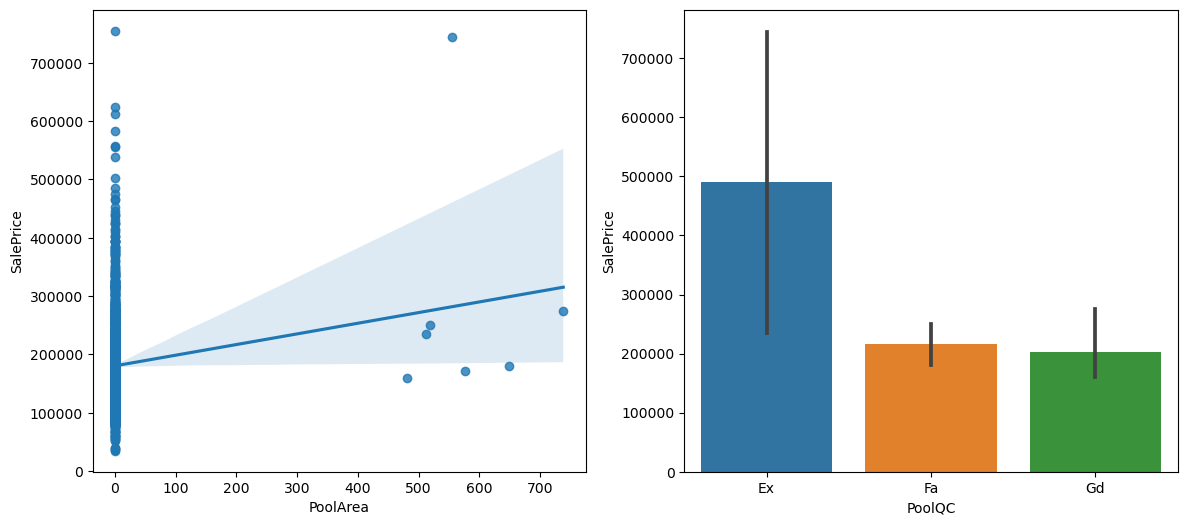

In [36]:
# 비정상적으로 빈 값이 많은 변수들 삭제
# 수영장있는 집
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.regplot(data=data, x='PoolArea', y='SalePrice', ax=ax1)
sns.barplot(data=data, x='PoolQC', y='SalePrice', ax=ax2)

In [37]:
all_data=all_data.drop(columns=['PoolArea','PoolQC'])

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

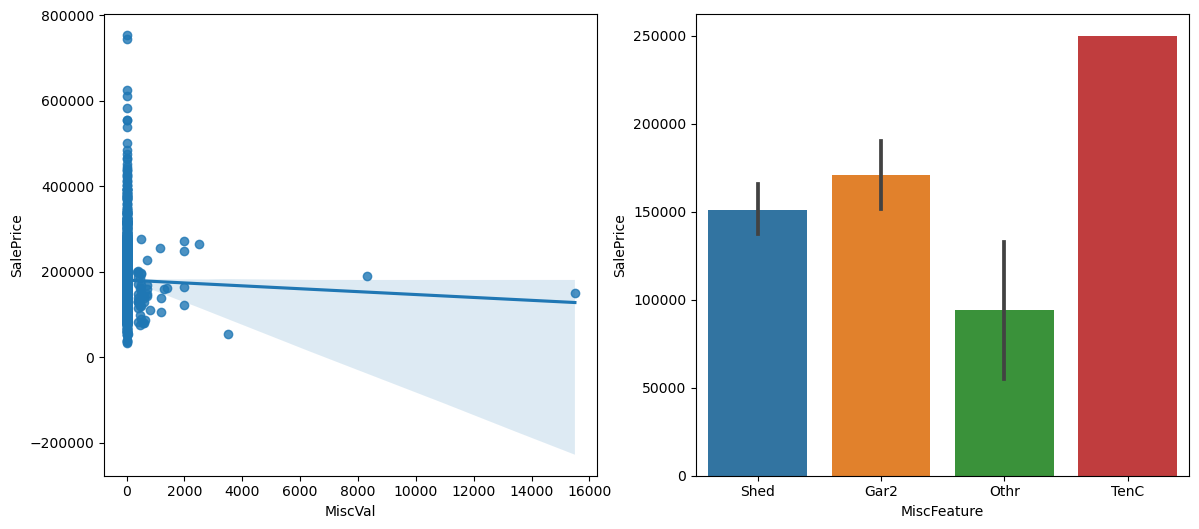

In [38]:
# 테니스코트 있는 집
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.regplot(data=data, x='MiscVal', y='SalePrice', ax=ax1)
sns.barplot(data=data, x='MiscFeature', y='SalePrice', ax=ax2)

In [39]:
all_data=all_data.drop(columns=['MiscVal','MiscFeature'])

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

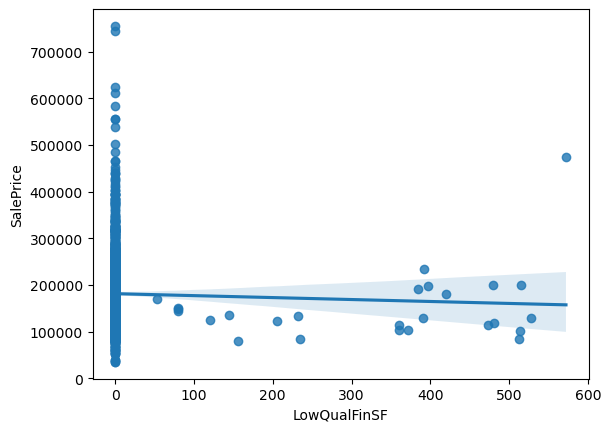

In [40]:
sns.regplot(data=data, x='LowQualFinSF', y='SalePrice')

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

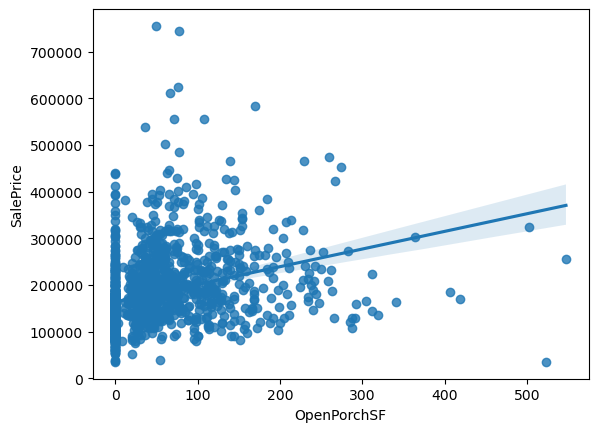

In [41]:
sns.regplot(data=data, x='OpenPorchSF', y='SalePrice')

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

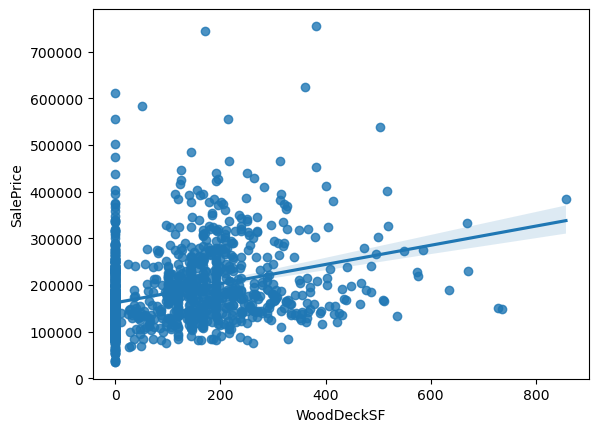

In [42]:
sns.regplot(data=data, x='WoodDeckSF', y='SalePrice')

In [43]:
# 이들은 0 값만 분리해주면 결과가 나쁘지 않을 것 같아서 0만 분리해주었다. 
all_data['NoLowQual']=(all_data['LowQualFinSF']==0)
all_data['NoOpenPorch']=(all_data['OpenPorchSF']==0)
all_data['NoWoodDeck']=(all_data['WoodDeckSF']==0)

## 전처리

### 범주형 변수
- 범주형 변수가 상당히 많은 데이터셋이다. 범주형 변수를 다짜고짜 1, 2, 3, 4, ... 로 인코딩해주면 머신러닝이 오해할 소지가 충분하기 때문에 일단 모조리 원핫 인코딩을 한다. 

In [44]:
non_numeric=all_data.select_dtypes(np.object)

def onehot(col_list):
    global all_data
    while len(col_list) !=0:
        col=col_list.pop(0)
        data_encoded=pd.get_dummies(all_data[col], prefix=col)
        all_data=pd.merge(all_data, data_encoded, on='Id')
        all_data=all_data.drop(columns=col)
    print(all_data.shape)
    
onehot(list(non_numeric))

(2917, 308)


C:\Users\ebdl\AppData\Local\Temp\ipykernel_20220\2522019925.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  non_numeric=all_data.select_dtypes(np.object)


### 수치형 변수
- 수치형 변수는 비대칭이 너무 심해지지 않게끔, Right Skewed 가 크게 되어있는 데이터들에만 로그를 씌워 적절히 변형시켜준다. 

In [45]:
numeric=all_data.select_dtypes(np.number)

def log_transform(col_list):
    transformed_col=[]
    while len(col_list)!=0:
        col=col_list.pop(0)
        if all_data[col].skew() > 0.5:
            all_data[col]=np.log(all_data[col]+1)
            transformed_col.append(col)
        else:
            pass
    print(f"{len(transformed_col)} features had been tranformed")
    print(all_data.shape)

log_transform(list(numeric))

255 features had been tranformed
(2917, 308)


### 학습준비

In [46]:
print(train.shape, test.shape)
Xtrain=all_data[:len(train)]
Xtest=all_data[len(train):]
print(Xtrain.shape, Xtest.shape)

(1458, 79) (1459, 79)
(1458, 308) (1459, 308)


## 모델 학습

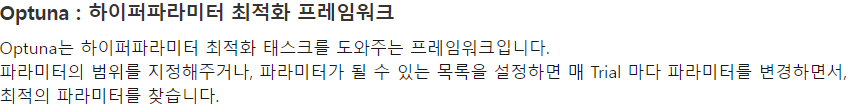

In [47]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import time
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

- RobustScaler()아웃라이어의 영향을 최소화한 기법이다. 중앙값(median)과 IQR(interquartile range)을 사용하기 때문에 
  
  StandardScaler와 비교해보면 표준화 후 동일한 값을 더 넓게 분포 시키고 있음을 확인 할 수 있다. 

In [48]:
# Optuna로 최적의 하이퍼파라미터 값을 찾음
model_Lasso= make_pipeline(RobustScaler(), Lasso(alpha =0.000327, random_state=18))

model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00052, l1_ratio=0.70654, random_state=18))

# huber 손실함수는 l1.l2의 장점을 취한 손실함수이다.
model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                         min_samples_split=10, loss='huber', random_state=18)

In [49]:
model_Lasso.fit(Xtrain, y_train)
Lasso_predictions=model_Lasso.predict(Xtest)
train_Lasso=model_Lasso.predict(Xtrain)

model_ENet.fit(Xtrain, y_train)
ENet_predictions=model_ENet.predict(Xtest)
train_ENet=model_ENet.predict(Xtrain)

model_GBoost.fit(Xtrain, y_train)
GBoost_predictions=model_GBoost.predict(Xtest)
train_GBoost=model_GBoost.predict(Xtrain)

log_train_predictions = (train_Lasso + train_ENet +train_GBoost)/ 3
train_score=np.sqrt(mean_squared_error(y_train, log_train_predictions))
print(f"Scoring with train data : {train_score}")

log_predictions=(Lasso_predictions + ENet_predictions + GBoost_predictions) / 3
predictions=np.exp(log_predictions)-1
submission['SalePrice']=predictions
submission.to_csv('submission_18011744_전민규.csv')

Scoring with train data : 0.07801153194061132


- 캐글에서 상위 10%안에 드는 점수
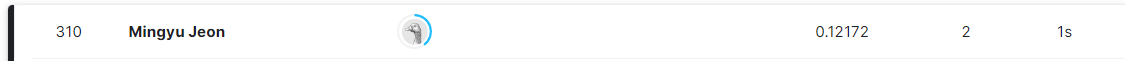